In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
root = os.getcwd()
root 

'./fair_taucc'

In [3]:
dataset = "movielens-1m"
sensitive = "gender"

In [4]:
df = pd.read_csv(root + f"/results/{dataset}/{sensitive}/taucc_fair/init_random/aggregated.csv")
df

,fair_major,fair_minor,tau_x_mean,tau_y_mean,NMI_true_labels_mean,AMI_true_labels_mean,ARI_true_labels_mean,NMI_rows_mean,AMI_rows_mean,ARI_rows_mean,...,NMI_rows_var,AMI_rows_var,ARI_rows_var,NMI_cols_var,AMI_cols_var,ARI_cols_var,balance_chierichetti_var,balance_bera_var,KL_fairness_error_var,time_var
0,0.0,0.0,0.117223,0.115133,0.119846,0.117872,0.107377,0.823447,0.823420,0.873928,...,0.016152,0.016159,0.017901,0.007643,0.007649,0.006172,5.559300e-04,0.002652,7.883202e-05,1007.259130
1,0.0,0.1,0.118573,0.117591,0.118934,0.117084,0.106330,0.851141,0.851121,0.903439,...,0.010250,0.010255,0.011266,0.004439,0.004442,0.002869,5.857572e-05,0.000262,4.221119e-06,450.535234
2,0.0,0.2,0.111028,0.108829,0.117275,0.115053,0.093196,0.685005,0.684952,0.720187,...,0.063727,0.063753,0.078866,0.041705,0.041733,0.046924,7.258013e-04,0.003650,1.264694e-04,667.420299
3,0.0,0.3,0.117303,0.115234,0.114707,0.112715,0.103359,0.840402,0.840376,0.883571,...,0.020633,0.020641,0.021855,0.010717,0.010725,0.007109,4.252072e-04,0.002036,6.457143e-05,876.244805
4,0.0,0.4,0.112421,0.111448,0.121024,0.118955,0.098179,0.752544,0.752502,0.785866,...,0.061984,0.062008,0.072436,0.046974,0.047005,0.055534,1.118219e-03,0.005820,3.757474e-04,700.424912
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,1.0,0.6,0.098336,0.099441,0.118727,0.116613,0.105999,0.567669,0.567600,0.621907,...,0.050733,0.050755,0.062144,0.026566,0.026581,0.022667,1.940769e-03,0.008809,6.751974e-04,34146.235952
117,1.0,0.7,0.106991,0.105056,0.112522,0.110521,0.100468,0.683600,0.683557,0.752718,...,0.004841,0.004844,0.007199,0.006403,0.006409,0.004845,4.588145e-04,0.001939,2.928952e-05,3806.363392
118,1.0,0.8,0.090258,0.102550,0.118275,0.116199,0.100320,0.542959,0.542873,0.563583,...,0.036987,0.037010,0.063429,0.031118,0.031140,0.036986,1.497374e-04,0.002818,1.324896e-04,17904.026055
119,1.0,0.9,0.066038,0.087720,0.110980,0.108496,0.089863,0.380173,0.380024,0.361879,...,0.032562,0.032585,0.057353,0.030905,0.030928,0.034361,3.081778e-07,0.006355,3.029491e-04,32644.274811


In [5]:
df_vanilla = pd.read_csv(root + f"/results/{dataset}/{sensitive}/taucc_vanilla/init_random/results_aggregated.csv")
df_vanilla

,tau_x_mean,tau_x_std,tau_x_var,tau_y_mean,tau_y_std,tau_y_var,NMI_mean,NMI_std,NMI_var,AMI_mean,...,balance_chierichetti_var,balance_bera_mean,balance_bera_std,balance_bera_var,KL_fairness_error_mean,KL_fairness_error_std,KL_fairness_error_var,time_mean,time_std,time_var
0,0.113785,0.008894,0.000079,0.110683,0.012225,0.000149,0.115085,0.011243,0.000126,0.112922,...,0.000584,0.786248,0.053321,0.002843,0.019257,0.009754,0.000095,3.617867,1.277285,1.631457


In [6]:
values = np.unique(df["fair_major"])
values

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [7]:
def create_path(path):
    if not os.path.exists(path):
        os.makedirs(path)

In [8]:
plot_path = root + f"/results/{dataset}/{sensitive}/plot"
create_path(plot_path)

## Plot of Fairness

Fairness for the majority group fixed (varying fairness for the minority group)

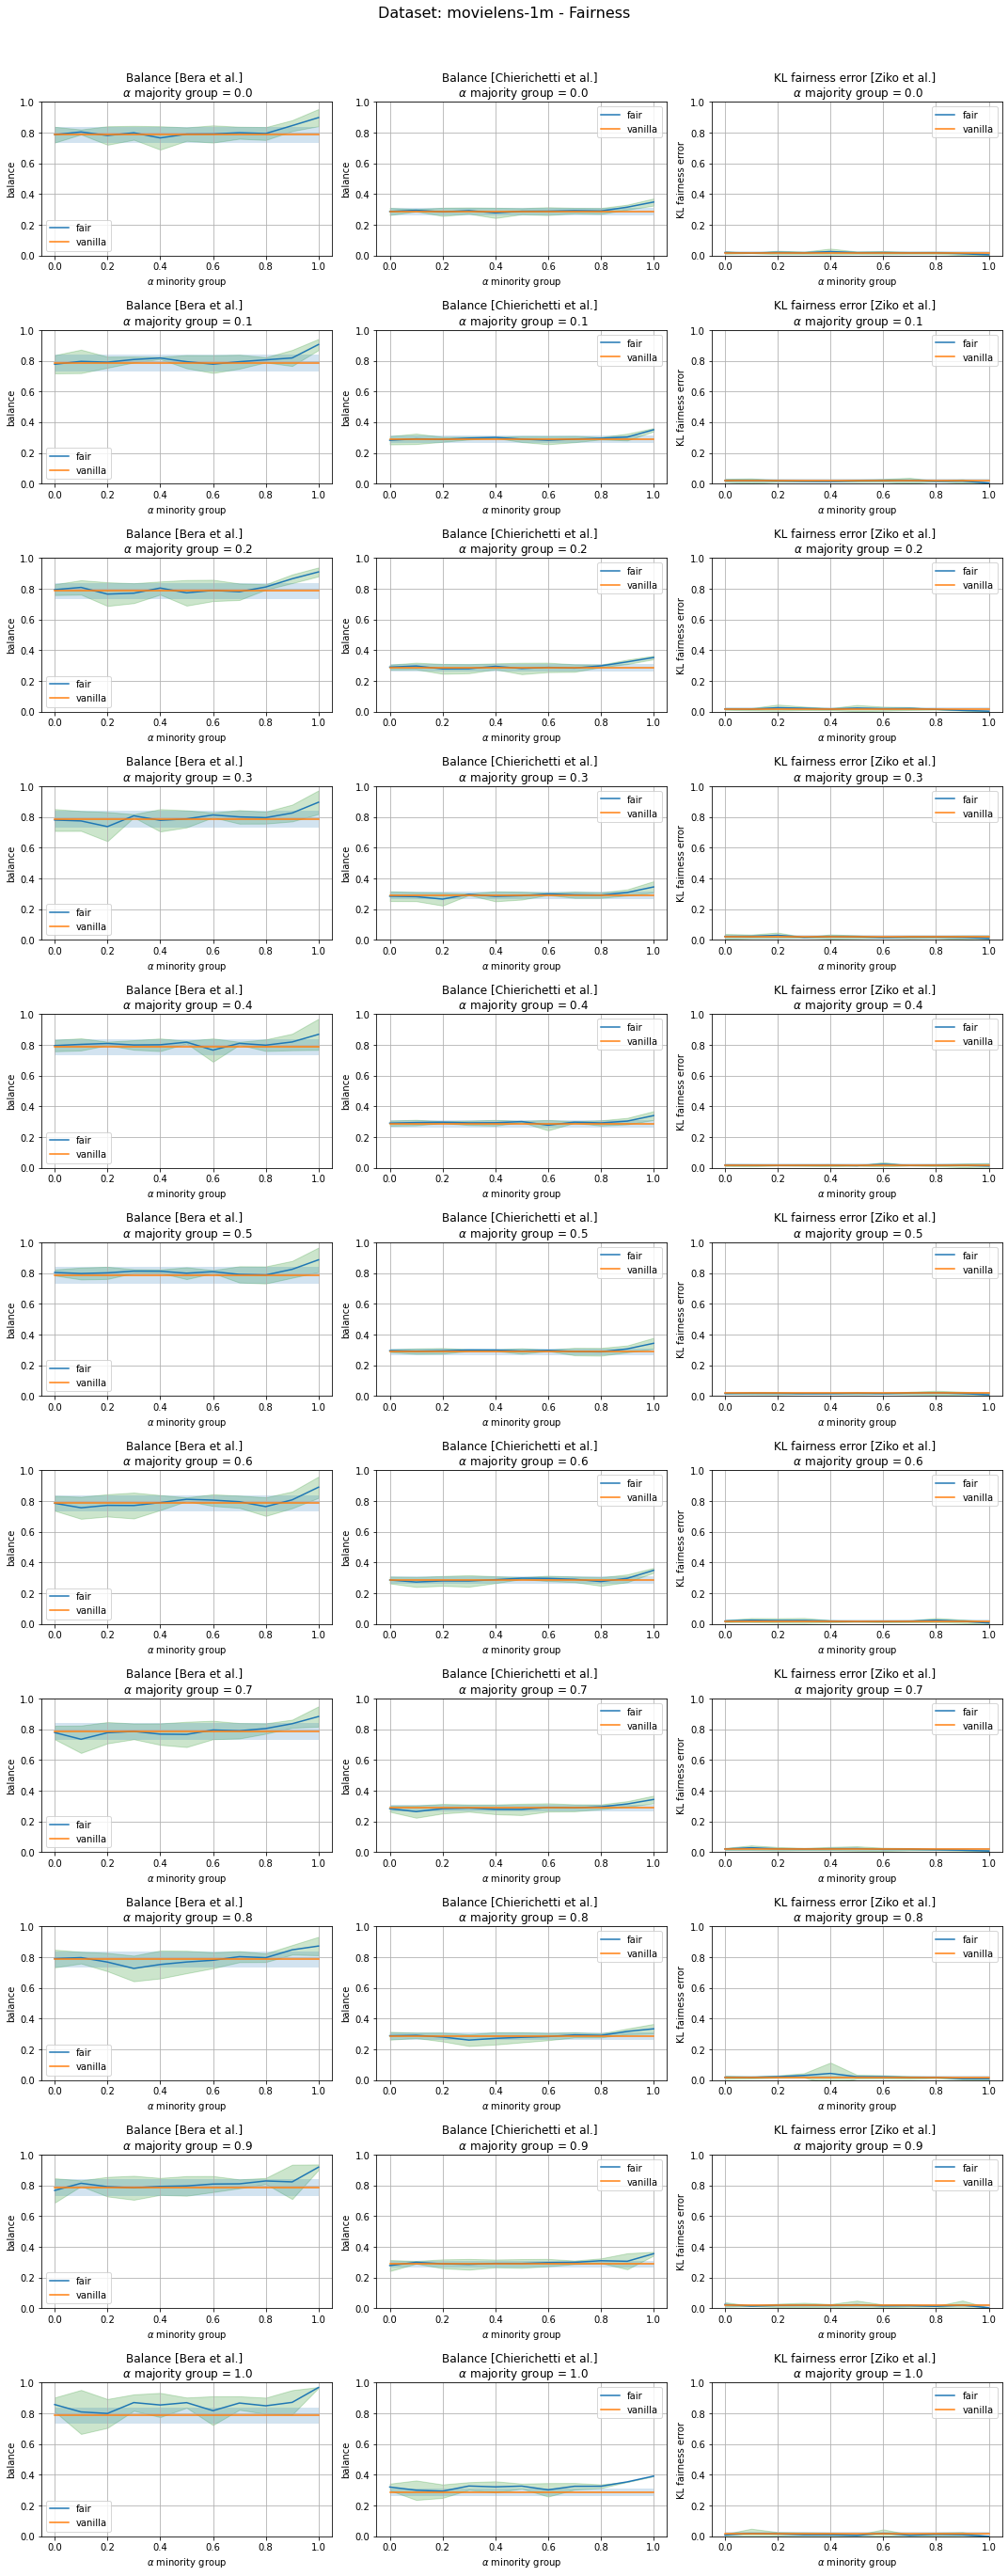

In [9]:
fig, axes = plt.subplots(11, 3, figsize=(15, 40))

vanilla_bera_mean = np.full(len(values), df_vanilla["balance_bera_mean"].values[0])
vanilla_bera_std = np.full(len(values), df_vanilla["balance_bera_std"].values[0])
vanilla_ch_mean = np.full(len(values), df_vanilla["balance_chierichetti_mean"].values[0])
vanilla_ch_std = np.full(len(values), df_vanilla["balance_chierichetti_std"].values[0])
vanilla_KL_mean = np.full(len(values), df_vanilla["KL_fairness_error_mean"].values[0])
vanilla_KL_std = np.full(len(values), df_vanilla["KL_fairness_error_std"].values[0])

for row, v in enumerate(values):
        
    temp = df[df["fair_major"] == v]
    x = np.array(temp["fair_minor"].values)
    balance_bera_mean = np.array(temp["balance_bera_mean"].values)
    balance_bera_std = np.array(temp["balance_bera_std"].values)
    
    balance_ch_mean = np.array(temp["balance_chierichetti_mean"].values)
    balance_ch_std = np.array(temp["balance_chierichetti_std"].values)
    
    KL_mean = np.array(temp["KL_fairness_error_mean"].values)
    KL_std = np.array(temp["KL_fairness_error_std"].values)
    
    ax = axes[row, 0]
    ax.plot(x, balance_bera_mean, label='fair')
    ax.fill_between(x, balance_bera_mean - balance_bera_std, balance_bera_mean + balance_bera_std, alpha=0.2, color='g')
    ax.plot(x, vanilla_bera_mean, label='vanilla')
    ax.fill_between(x, vanilla_bera_mean - vanilla_bera_std, vanilla_bera_mean + vanilla_bera_std, alpha=0.2)
    ax.set_ylim(0.0, 1.0)
    ax.legend()
    ax.set_xlabel('$\\alpha$ minority group')
    ax.set_ylabel('balance')
    ax.set_title(f'Balance [Bera et al.] \n $\\alpha$ majority group = {v}')
    ax.grid(True)
    
    ax1 = axes[row, 1]
    ax1.plot(x, balance_ch_mean, label='fair')
    ax1.fill_between(x, balance_ch_mean - balance_ch_std, balance_ch_mean + balance_ch_std, alpha=0.2, color='g')
    ax1.plot(x, vanilla_ch_mean, label='vanilla')
    ax1.fill_between(x, vanilla_ch_mean - vanilla_ch_std, vanilla_ch_mean + vanilla_ch_std, alpha=0.2) 
    ax1.set_ylim(0.0, 1.0)
    ax1.legend()
    ax1.set_xlabel('$\\alpha$ minority group')
    ax1.set_ylabel('balance')
    ax1.set_title(f'Balance [Chierichetti et al.] \n $\\alpha$ majority group = {v}')
    ax1.grid(True)
    
    ax2 = axes[row, 2]
    ax2.plot(x, KL_mean, label='fair')
    ax2.fill_between(x, KL_mean - KL_std, KL_mean + KL_std, alpha=0.2, color='g')
    ax2.plot(x, vanilla_KL_mean, label='vanilla')
    ax2.fill_between(x, vanilla_KL_mean - vanilla_KL_std, vanilla_KL_mean + vanilla_KL_std, alpha=0.2)
    ax2.set_ylim(0.0, 1.0)
    ax2.legend()
    ax2.set_xlabel('$\\alpha$ minority group')
    ax2.set_ylabel('KL fairness error')
    ax2.set_title(f'KL fairness error [Ziko et al.] \n $\\alpha$ majority group = {v}')
    ax2.grid(True)
        
plt.tight_layout(rect=[0, 0.03, 1, 0.96])
fig.suptitle(f"Dataset: {dataset} - Fairness", fontsize=16)
#plt.show()
plt.savefig(plot_path + f"/fairness_majority.png")

Fairness for the minority group fixed (varying fairness for the majority group)

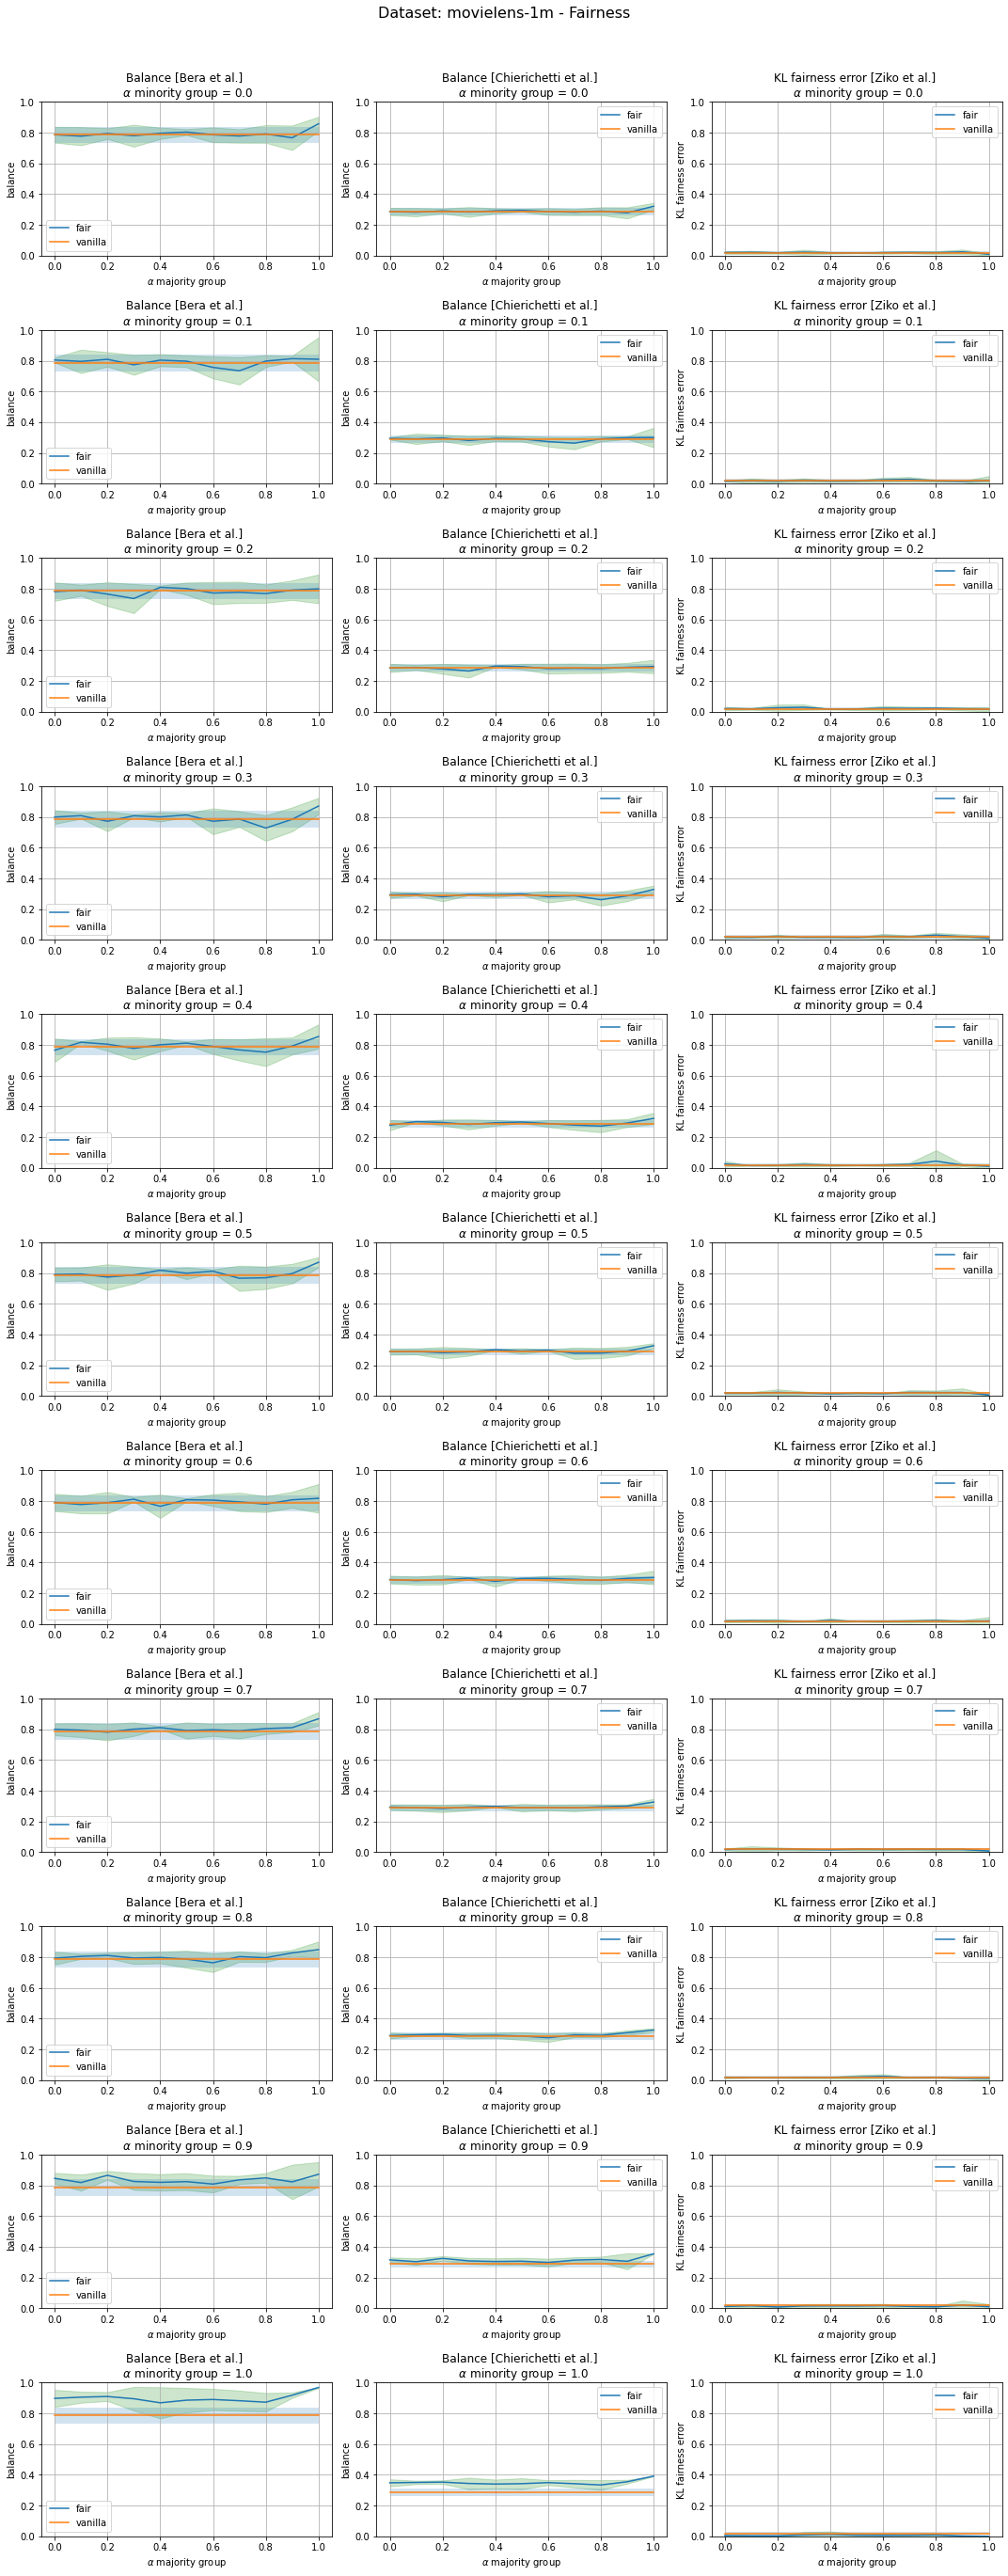

In [10]:
fig, axes = plt.subplots(11, 3, figsize=(15, 40))

for row, v in enumerate(values):
    
    temp = df[df["fair_minor"] == v]
    x = np.array(temp["fair_major"].values)
    balance_bera_mean = np.array(temp["balance_bera_mean"].values)
    balance_bera_std = np.array(temp["balance_bera_std"].values)
    
    balance_ch_mean = np.array(temp["balance_chierichetti_mean"].values)
    balance_ch_std = np.array(temp["balance_chierichetti_std"].values)
    
    KL_mean = np.array(temp["KL_fairness_error_mean"].values)
    KL_std = np.array(temp["KL_fairness_error_std"].values)
    
    ax = axes[row, 0]
    ax.plot(x, balance_bera_mean, label='fair')
    ax.fill_between(x, balance_bera_mean - balance_bera_std, balance_bera_mean + balance_bera_std, alpha=0.2, color='g')
    ax.plot(x, vanilla_bera_mean, label='vanilla')
    ax.fill_between(x, vanilla_bera_mean - vanilla_bera_std, vanilla_bera_mean + vanilla_bera_std, alpha=0.2)
    ax.set_ylim(0.0, 1.0)
    ax.legend()
    ax.set_xlabel('$\\alpha$ majority group')
    ax.set_ylabel('balance')
    ax.set_title(f'Balance [Bera et al.] \n $\\alpha$ minority group = {v}')
    ax.grid(True)
    
    ax1 = axes[row, 1]
    ax1.plot(x, balance_ch_mean, label='fair')
    ax1.fill_between(x, balance_ch_mean - balance_ch_std, balance_ch_mean + balance_ch_std, alpha=0.2, color='g')
    ax1.plot(x, vanilla_ch_mean, label='vanilla')
    ax1.fill_between(x, vanilla_ch_mean - vanilla_ch_std, vanilla_ch_mean + vanilla_ch_std, alpha=0.2) 
    ax1.set_ylim(0.0, 1.0)
    ax1.legend()
    ax1.set_xlabel('$\\alpha$ majority group')
    ax1.set_ylabel('balance')
    ax1.set_title(f'Balance [Chierichetti et al.] \n $\\alpha$ minority group = {v}')
    ax1.grid(True)
    
    ax2 = axes[row, 2]
    ax2.plot(x, KL_mean, label='fair')
    ax2.fill_between(x, KL_mean - KL_std, KL_mean + KL_std, alpha=0.2, color='g')
    ax2.plot(x, vanilla_KL_mean, label='vanilla')
    ax2.fill_between(x, vanilla_KL_mean - vanilla_KL_std, vanilla_KL_mean + vanilla_KL_std, alpha=0.2)
    ax2.set_ylim(0.0, 1.0)
    ax2.legend()
    ax2.set_xlabel('$\\alpha$ majority group')
    ax2.set_ylabel('KL fairness error')
    ax2.set_title(f'KL fairness error [Ziko et al.] \n $\\alpha$ minority group = {v}')
    ax2.grid(True)
        
plt.tight_layout(rect=[0, 0.03, 1, 0.96])
fig.suptitle(f"Dataset: {dataset} - Fairness", fontsize=16)
#plt.show()
plt.savefig(plot_path + f"/fairness_minority.png")

## Plot of NMI, ARI, AMI w.r.t. true labels

NMI, ARI, AMI w.r.t. true labels (fairness for majority group fixed)

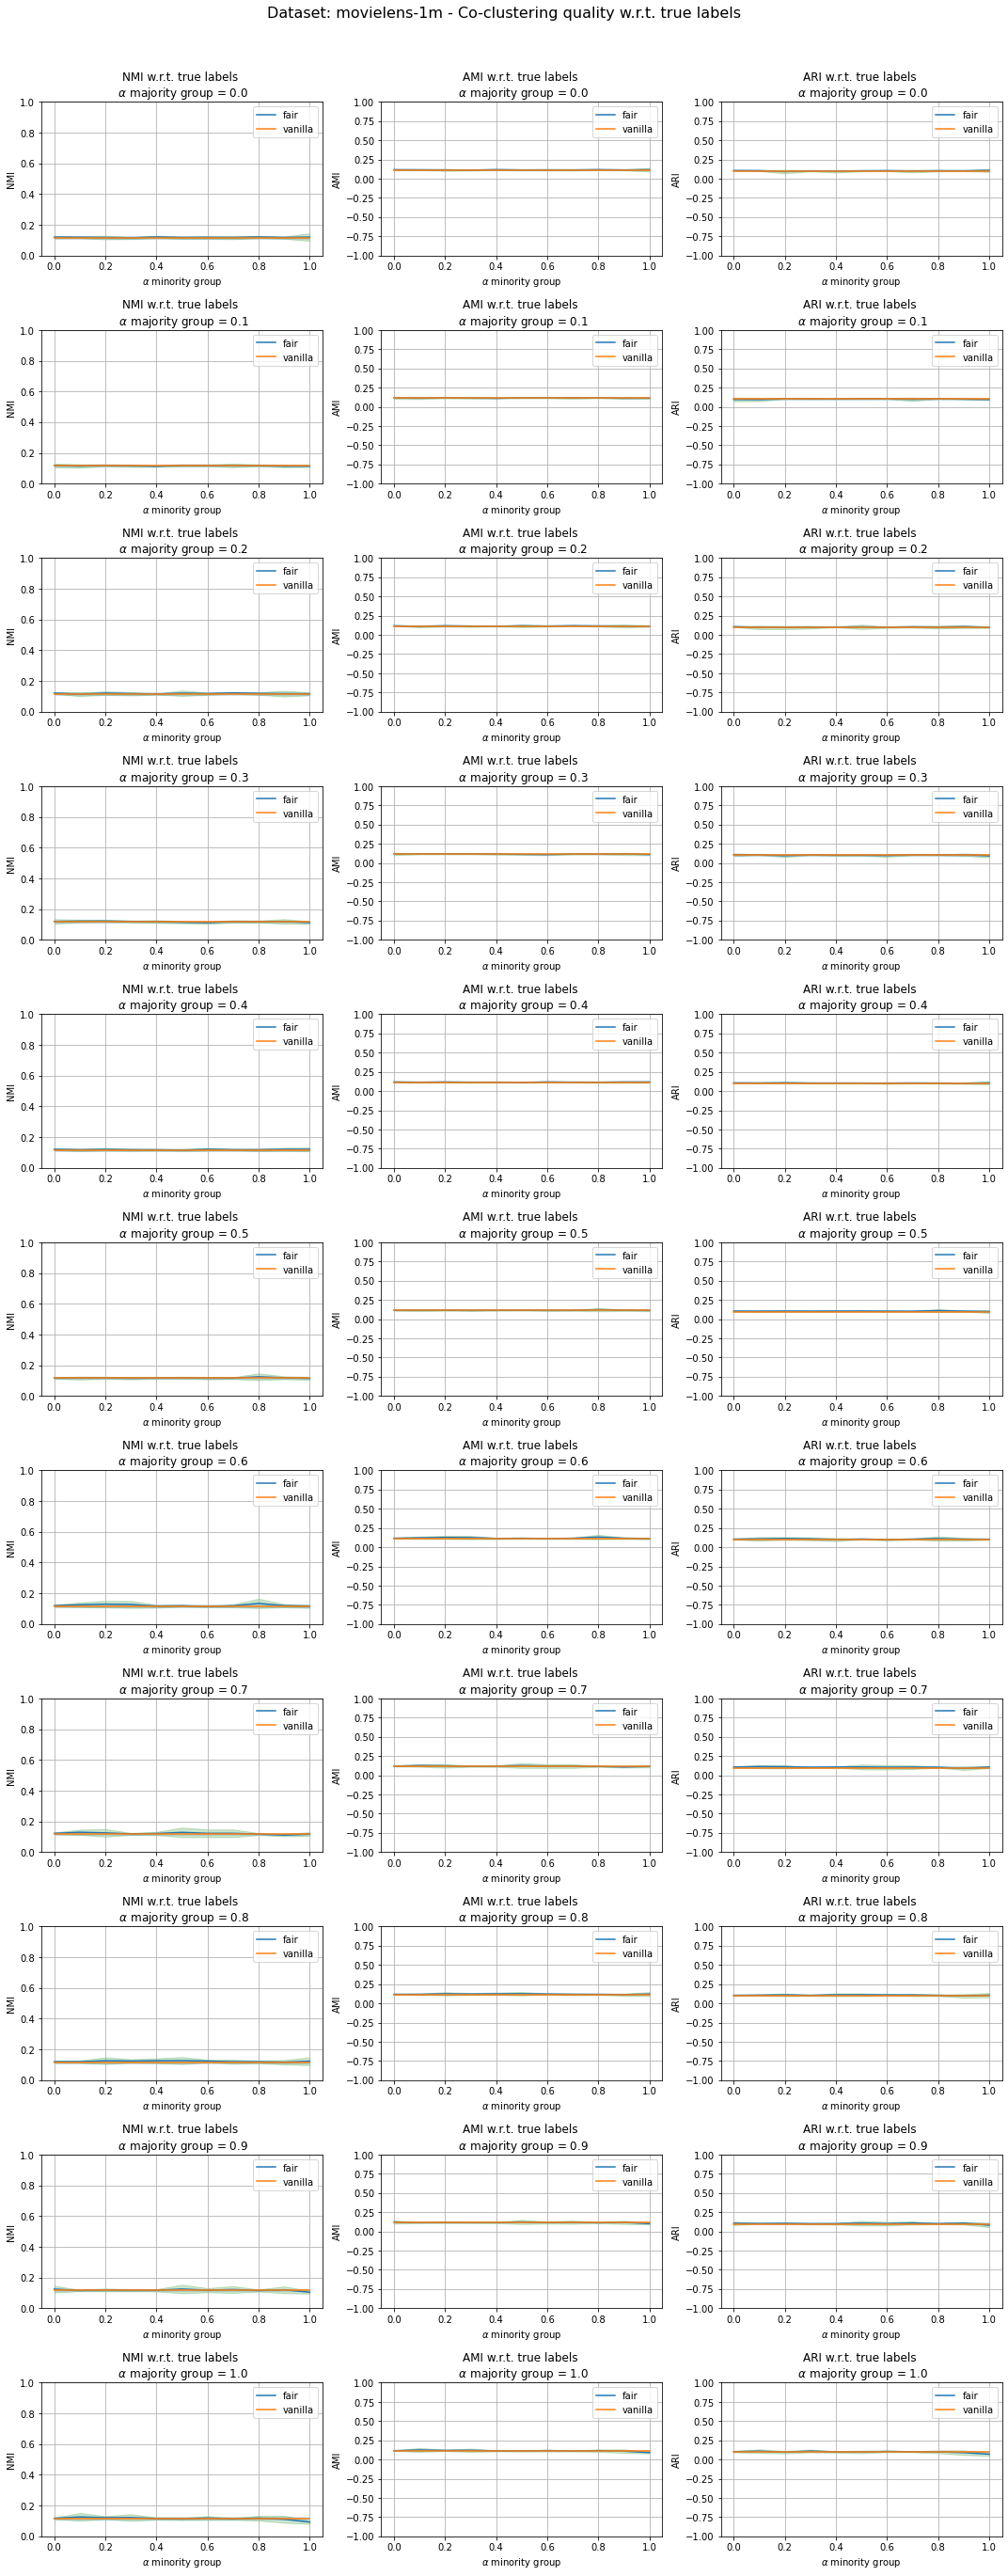

In [11]:
fig, axes = plt.subplots(11, 3, figsize=(15, 40))

vanilla_NMI_mean = np.full(len(values), df_vanilla["NMI_mean"].values[0])
vanilla_NMI_std = np.full(len(values), df_vanilla["NMI_std"].values[0])
vanilla_AMI_mean = np.full(len(values), df_vanilla["AMI_mean"].values[0])
vanilla_AMI_std = np.full(len(values), df_vanilla["AMI_std"].values[0])
vanilla_ARI_mean = np.full(len(values), df_vanilla["ARI_mean"].values[0])
vanilla_ARI_std = np.full(len(values), df_vanilla["ARI_std"].values[0])

for row, v in enumerate(values):
        
    temp = df[df["fair_major"] == v]
    x = np.array(temp["fair_minor"].values)
    
    NMI_mean = np.array(temp["NMI_true_labels_mean"].values)
    NMI_std = np.array(temp["NMI_true_labels_std"].values)
    
    AMI_mean = np.array(temp["AMI_true_labels_mean"].values)
    AMI_std = np.array(temp["AMI_true_labels_std"].values)
    
    ARI_mean = np.array(temp["ARI_true_labels_mean"].values)
    ARI_std = np.array(temp["ARI_true_labels_std"].values)
    
    ax = axes[row, 0]
    ax.plot(x, NMI_mean, label='fair')
    ax.fill_between(x, NMI_mean - NMI_std, NMI_mean + NMI_std, alpha=0.2, color='g')
    ax.plot(x, vanilla_NMI_mean, label='vanilla')
    ax.fill_between(x, vanilla_NMI_mean - vanilla_NMI_std, vanilla_NMI_mean + vanilla_NMI_std, alpha=0.2)
    ax.set_ylim(0.0, 1.0)
    ax.legend()
    ax.set_xlabel('$\\alpha$ minority group')
    ax.set_ylabel('NMI')
    ax.set_title(f'NMI w.r.t. true labels \n $\\alpha$ majority group = {v}')
    ax.grid(True)
    
    ax1 = axes[row, 1]
    ax1.plot(x, AMI_mean, label='fair')
    ax1.fill_between(x, AMI_mean - AMI_std, AMI_mean + AMI_std, alpha=0.2, color='g')
    ax1.plot(x, vanilla_AMI_mean, label='vanilla')
    ax1.fill_between(x, vanilla_AMI_mean - vanilla_AMI_std, vanilla_AMI_mean + vanilla_AMI_std, alpha=0.2) 
    ax1.set_ylim(-1.0, 1.0)
    ax1.legend()
    ax1.set_xlabel('$\\alpha$ minority group')
    ax1.set_ylabel('AMI')
    ax1.set_title(f'AMI w.r.t. true labels \n $\\alpha$ majority group = {v}')
    ax1.grid(True)
    
    ax2 = axes[row, 2]
    ax2.plot(x, ARI_mean, label='fair')
    ax2.fill_between(x, ARI_mean - ARI_std, ARI_mean + ARI_std, alpha=0.2, color='g')
    ax2.plot(x, vanilla_ARI_mean, label='vanilla')
    ax2.fill_between(x, vanilla_ARI_mean - vanilla_ARI_std, vanilla_ARI_mean + vanilla_ARI_std, alpha=0.2)
    ax2.set_ylim(-1.0, 1.0)
    ax2.legend()
    ax2.set_xlabel('$\\alpha$ minority group')
    ax2.set_ylabel('ARI')
    ax2.set_title(f'ARI w.r.t. true labels \n $\\alpha$ majority group = {v}')
    ax2.grid(True)
        
plt.tight_layout(rect=[0, 0.03, 1, 0.96])
fig.suptitle(f"Dataset: {dataset} - Co-clustering quality w.r.t. true labels", fontsize=16)
#plt.show()
plt.savefig(plot_path + f"/true_labels_majority.png")

NMI, ARI, AMI w.r.t. true labels (fairness for minority group fixed)

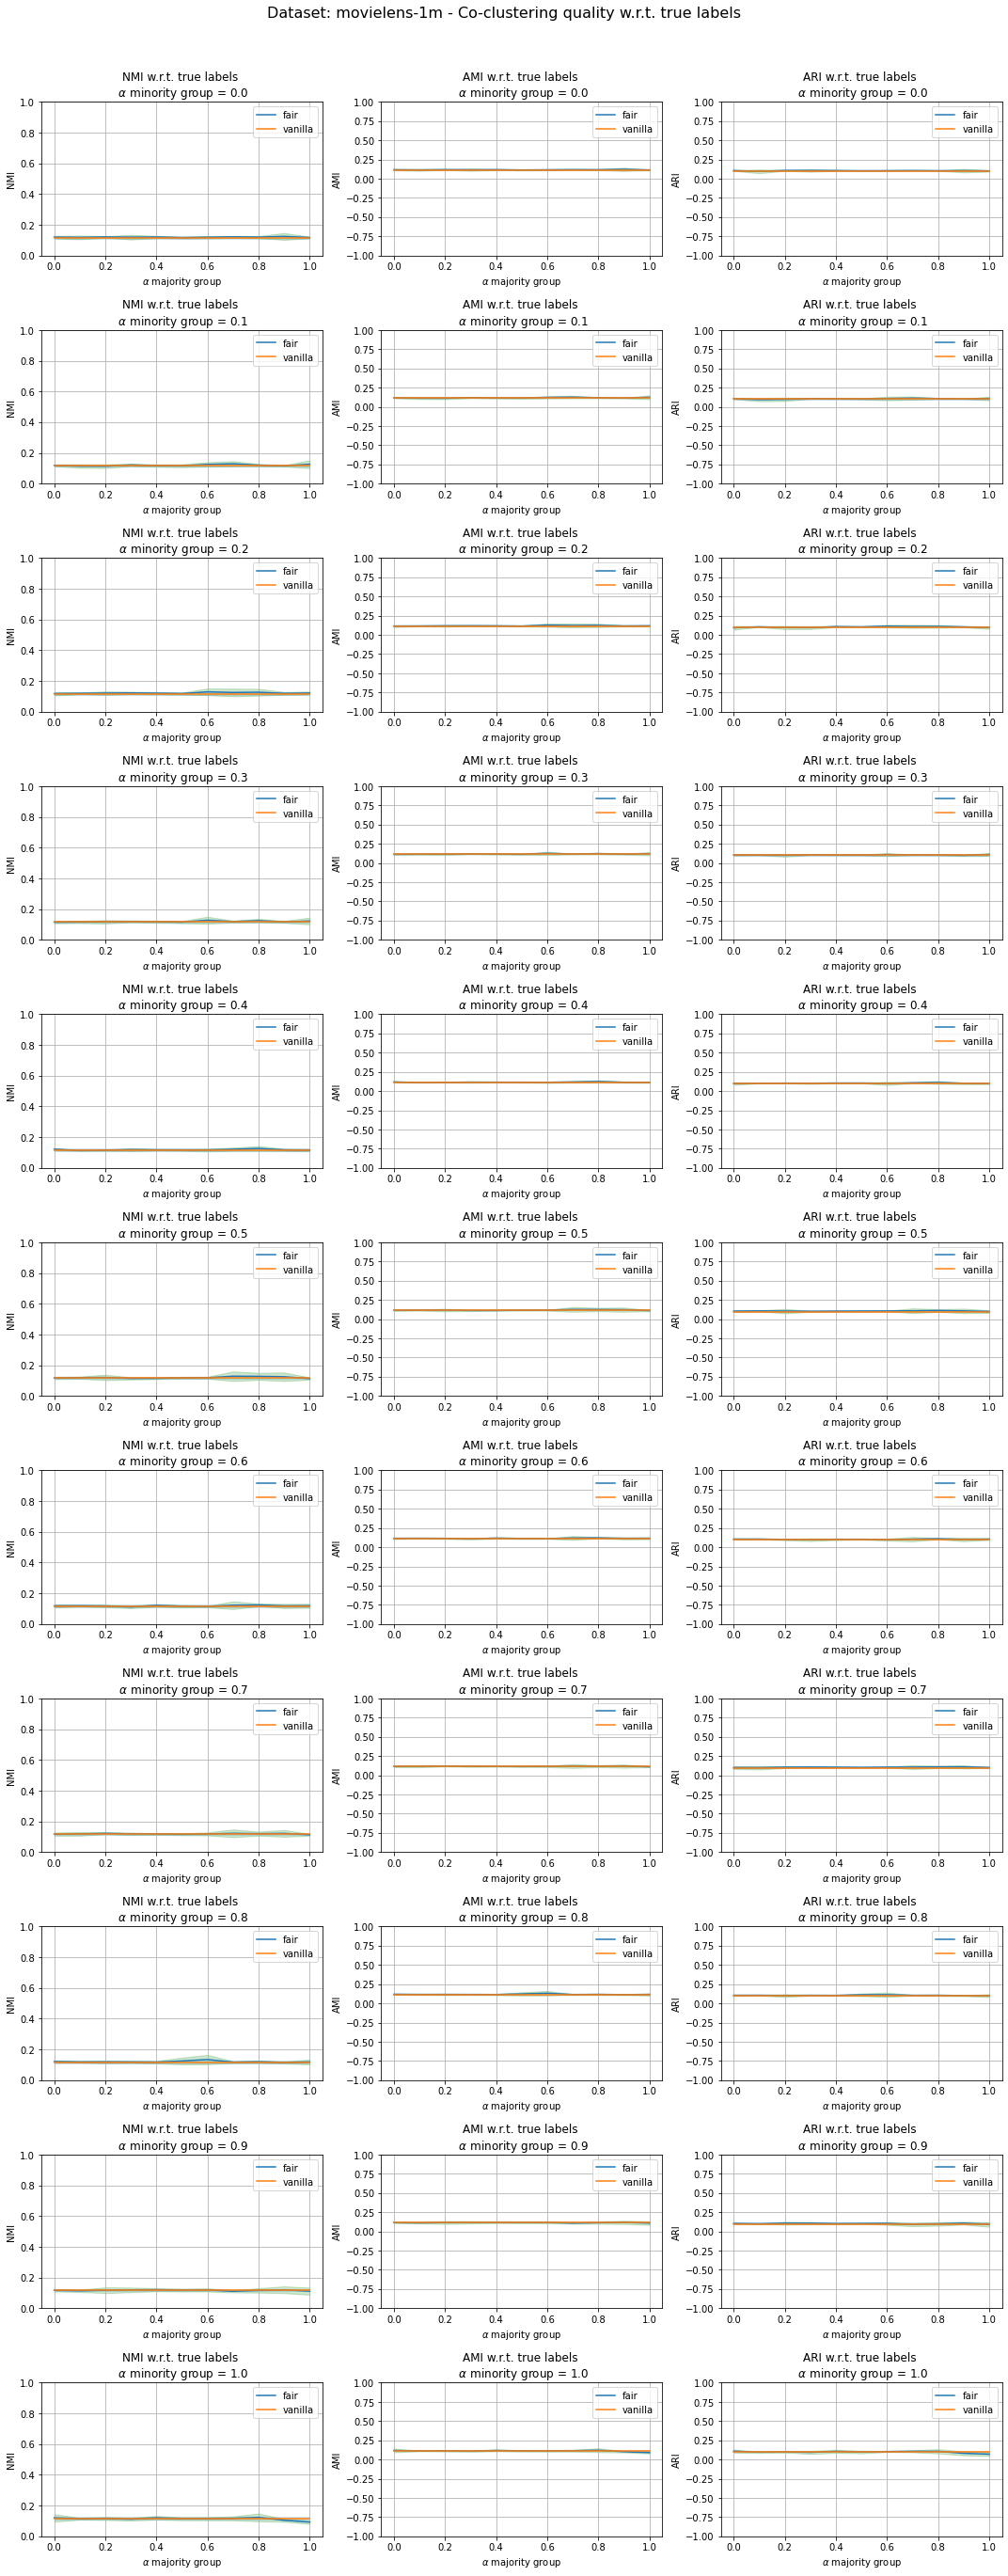

In [12]:
fig, axes = plt.subplots(11, 3, figsize=(15, 40))

vanilla_NMI_mean = np.full(len(values), df_vanilla["NMI_mean"].values[0])
vanilla_NMI_std = np.full(len(values), df_vanilla["NMI_std"].values[0])
vanilla_AMI_mean = np.full(len(values), df_vanilla["AMI_mean"].values[0])
vanilla_AMI_std = np.full(len(values), df_vanilla["AMI_std"].values[0])
vanilla_ARI_mean = np.full(len(values), df_vanilla["ARI_mean"].values[0])
vanilla_ARI_std = np.full(len(values), df_vanilla["ARI_std"].values[0])

for row, v in enumerate(values):
        
    temp = df[df["fair_minor"] == v]
    x = np.array(temp["fair_major"].values)
    
    NMI_mean = np.array(temp["NMI_true_labels_mean"].values)
    NMI_std = np.array(temp["NMI_true_labels_std"].values)
    
    AMI_mean = np.array(temp["AMI_true_labels_mean"].values)
    AMI_std = np.array(temp["AMI_true_labels_std"].values)
    
    ARI_mean = np.array(temp["ARI_true_labels_mean"].values)
    ARI_std = np.array(temp["ARI_true_labels_std"].values)
    
    ax = axes[row, 0]
    ax.plot(x, NMI_mean, label='fair')
    ax.fill_between(x, NMI_mean - NMI_std, NMI_mean + NMI_std, alpha=0.2, color='g')
    ax.plot(x, vanilla_NMI_mean, label='vanilla')
    ax.fill_between(x, vanilla_NMI_mean - vanilla_NMI_std, vanilla_NMI_mean + vanilla_NMI_std, alpha=0.2)
    ax.set_ylim(0.0, 1.0)
    ax.legend()
    ax.set_xlabel('$\\alpha$ majority group')
    ax.set_ylabel('NMI')
    ax.set_title(f'NMI w.r.t. true labels \n $\\alpha$ minority group = {v}')
    ax.grid(True)
    
    ax1 = axes[row, 1]
    ax1.plot(x, AMI_mean, label='fair')
    ax1.fill_between(x, AMI_mean - AMI_std, AMI_mean + AMI_std, alpha=0.2, color='g')
    ax1.plot(x, vanilla_AMI_mean, label='vanilla')
    ax1.fill_between(x, vanilla_AMI_mean - vanilla_AMI_std, vanilla_AMI_mean + vanilla_AMI_std, alpha=0.2) 
    ax1.set_ylim(-1.0, 1.0)
    ax1.legend()
    ax1.set_xlabel('$\\alpha$ majority group')
    ax1.set_ylabel('AMI')
    ax1.set_title(f'AMI w.r.t. true labels \n $\\alpha$ minority group = {v}')
    ax1.grid(True)
    
    ax2 = axes[row, 2]
    ax2.plot(x, ARI_mean, label='fair')
    ax2.fill_between(x, ARI_mean - ARI_std, ARI_mean + ARI_std, alpha=0.2, color='g')
    ax2.plot(x, vanilla_ARI_mean, label='vanilla')
    ax2.fill_between(x, vanilla_ARI_mean - vanilla_ARI_std, vanilla_ARI_mean + vanilla_ARI_std, alpha=0.2)
    ax2.set_ylim(-1.0, 1.0)
    ax2.legend()
    ax2.set_xlabel('$\\alpha$ majority group')
    ax2.set_ylabel('ARI')
    ax2.set_title(f'ARI w.r.t. true labels \n $\\alpha$ minority group = {v}')
    ax2.grid(True)
        
plt.tight_layout(rect=[0, 0.03, 1, 0.96])
fig.suptitle(f"Dataset: {dataset} - Co-clustering quality w.r.t. true labels", fontsize=16)
#plt.show()
plt.savefig(plot_path + f"/true_labels_minority.png")

## Plot of NMI, ARI, AMI w.r.t. rows of Vanilla TauCC

NMI, ARI, AMI w.r.t. Vanilla TauCC rows (fairness for majority group fixed)

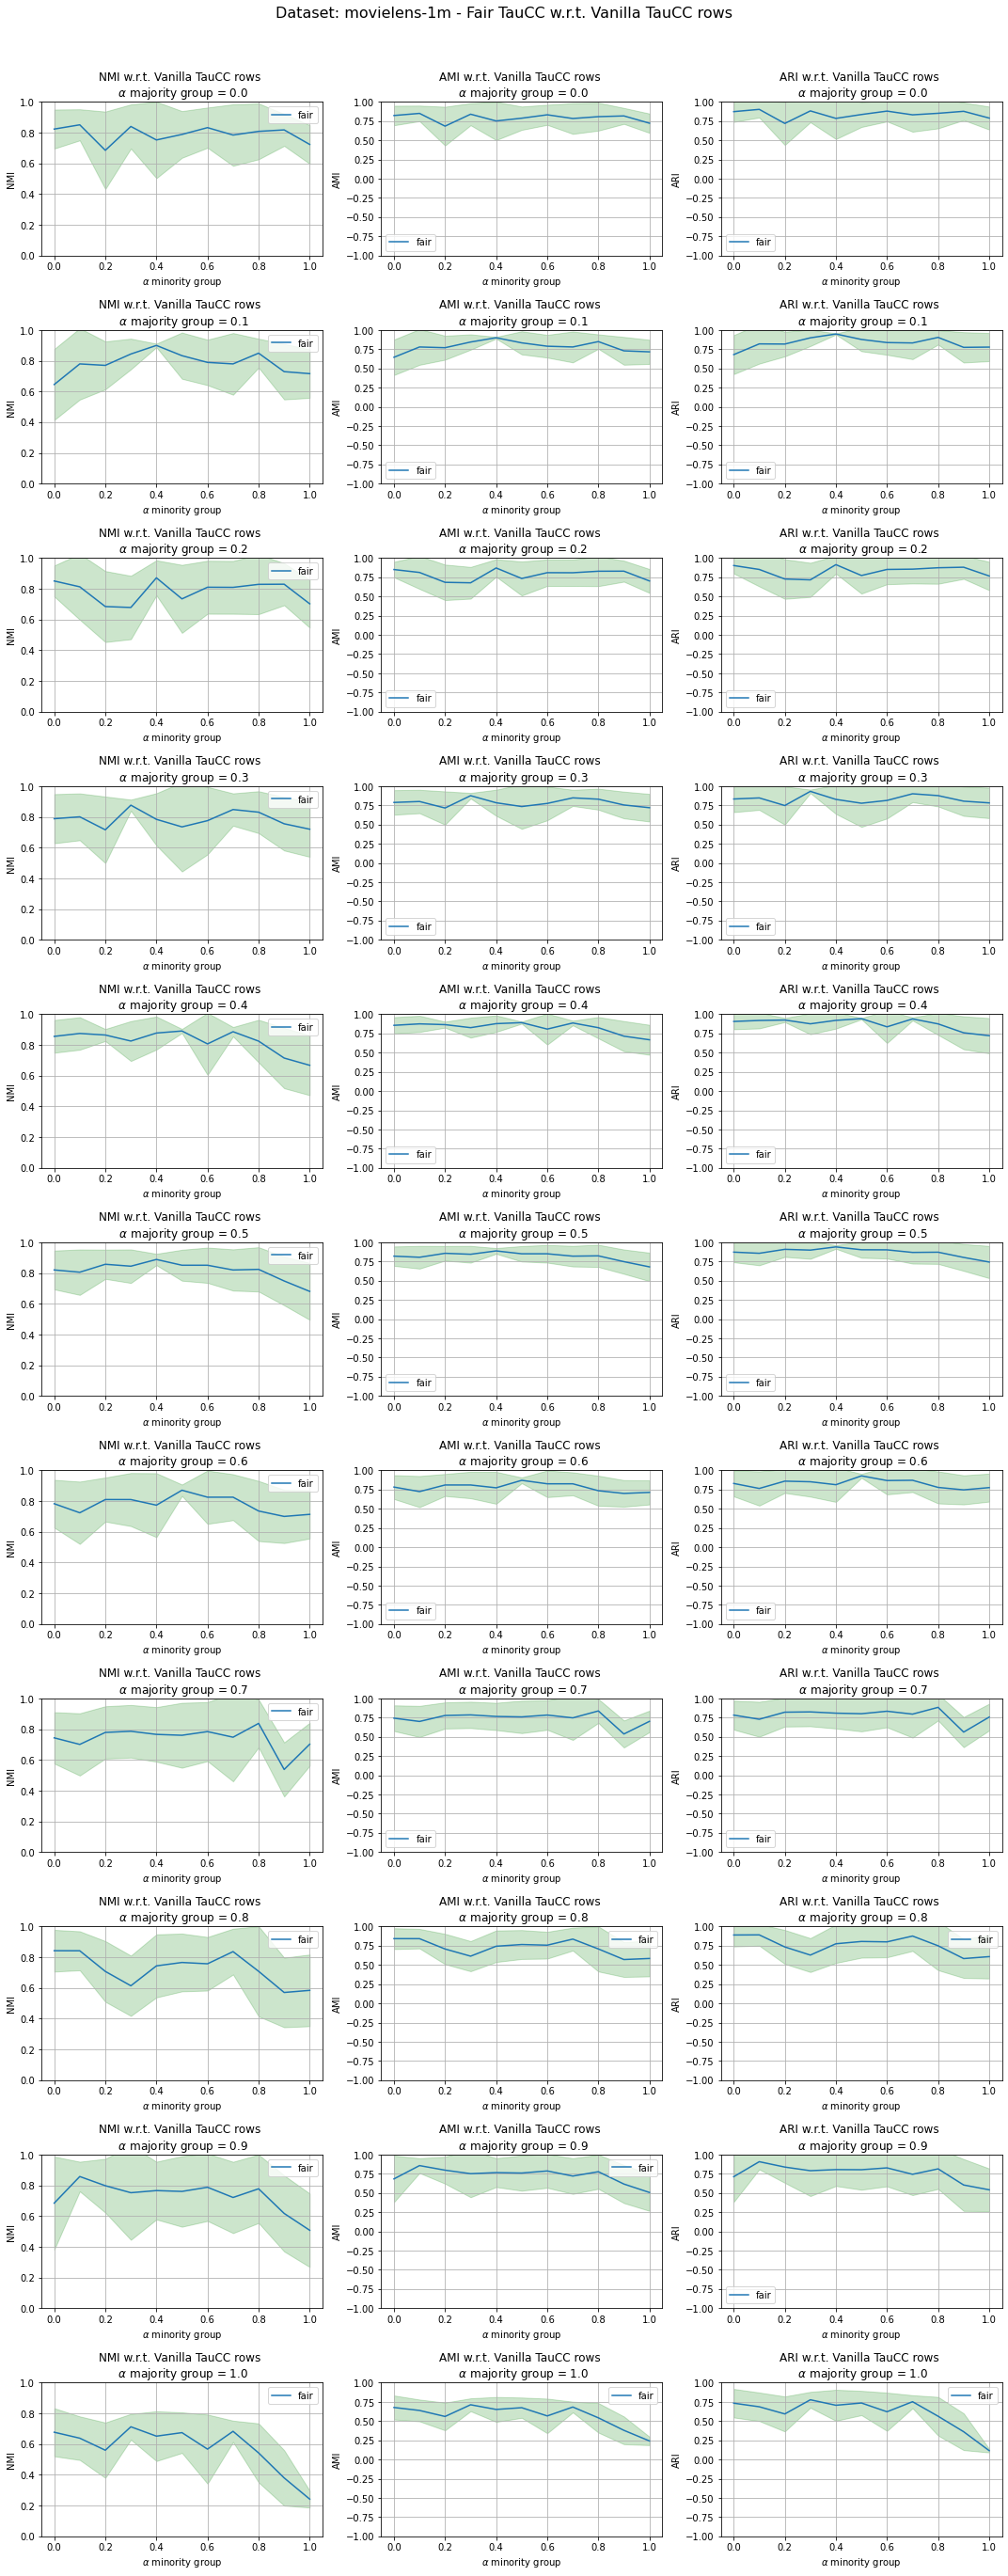

In [13]:
fig, axes = plt.subplots(11, 3, figsize=(15, 40))


for row, v in enumerate(values):
        
    temp = df[df["fair_major"] == v]
    x = np.array(temp["fair_minor"].values)
    
    NMI_mean = np.array(temp["NMI_rows_mean"].values)
    NMI_std = np.array(temp["NMI_rows_std"].values)
    
    AMI_mean = np.array(temp["AMI_rows_mean"].values)
    AMI_std = np.array(temp["AMI_rows_std"].values)
    
    ARI_mean = np.array(temp["ARI_rows_mean"].values)
    ARI_std = np.array(temp["ARI_rows_std"].values)
    
    ax = axes[row, 0]
    ax.plot(x, NMI_mean, label='fair')
    ax.fill_between(x, NMI_mean - NMI_std, NMI_mean + NMI_std, alpha=0.2, color='g')
    ax.set_ylim(0.0, 1.0)
    ax.legend()
    ax.set_xlabel('$\\alpha$ minority group')
    ax.set_ylabel('NMI')
    ax.set_title(f'NMI w.r.t. Vanilla TauCC rows \n $\\alpha$ majority group = {v}')
    ax.grid(True)
    
    ax1 = axes[row, 1]
    ax1.plot(x, AMI_mean, label='fair')
    ax1.fill_between(x, AMI_mean - AMI_std, AMI_mean + AMI_std, alpha=0.2, color='g')
    ax1.set_ylim(-1.0, 1.0)
    ax1.legend()
    ax1.set_xlabel('$\\alpha$ minority group')
    ax1.set_ylabel('AMI')
    ax1.set_title(f'AMI w.r.t. Vanilla TauCC rows \n $\\alpha$ majority group = {v}')
    ax1.grid(True)
    
    ax2 = axes[row, 2]
    ax2.plot(x, ARI_mean, label='fair')
    ax2.fill_between(x, ARI_mean - ARI_std, ARI_mean + ARI_std, alpha=0.2, color='g')
    ax2.set_ylim(-1.0, 1.0)
    ax2.legend()
    ax2.set_xlabel('$\\alpha$ minority group')
    ax2.set_ylabel('ARI')
    ax2.set_title(f'ARI w.r.t. Vanilla TauCC rows \n $\\alpha$ majority group = {v}')
    ax2.grid(True)
        
plt.tight_layout(rect=[0, 0.03, 1, 0.96])
fig.suptitle(f"Dataset: {dataset} - Fair TauCC w.r.t. Vanilla TauCC rows", fontsize=16)
#plt.show()
plt.savefig(plot_path + f"/rows_majority.png")

NMI, ARI, AMI w.r.t. Vanilla TauCC rows (fairness for minority group fixed)

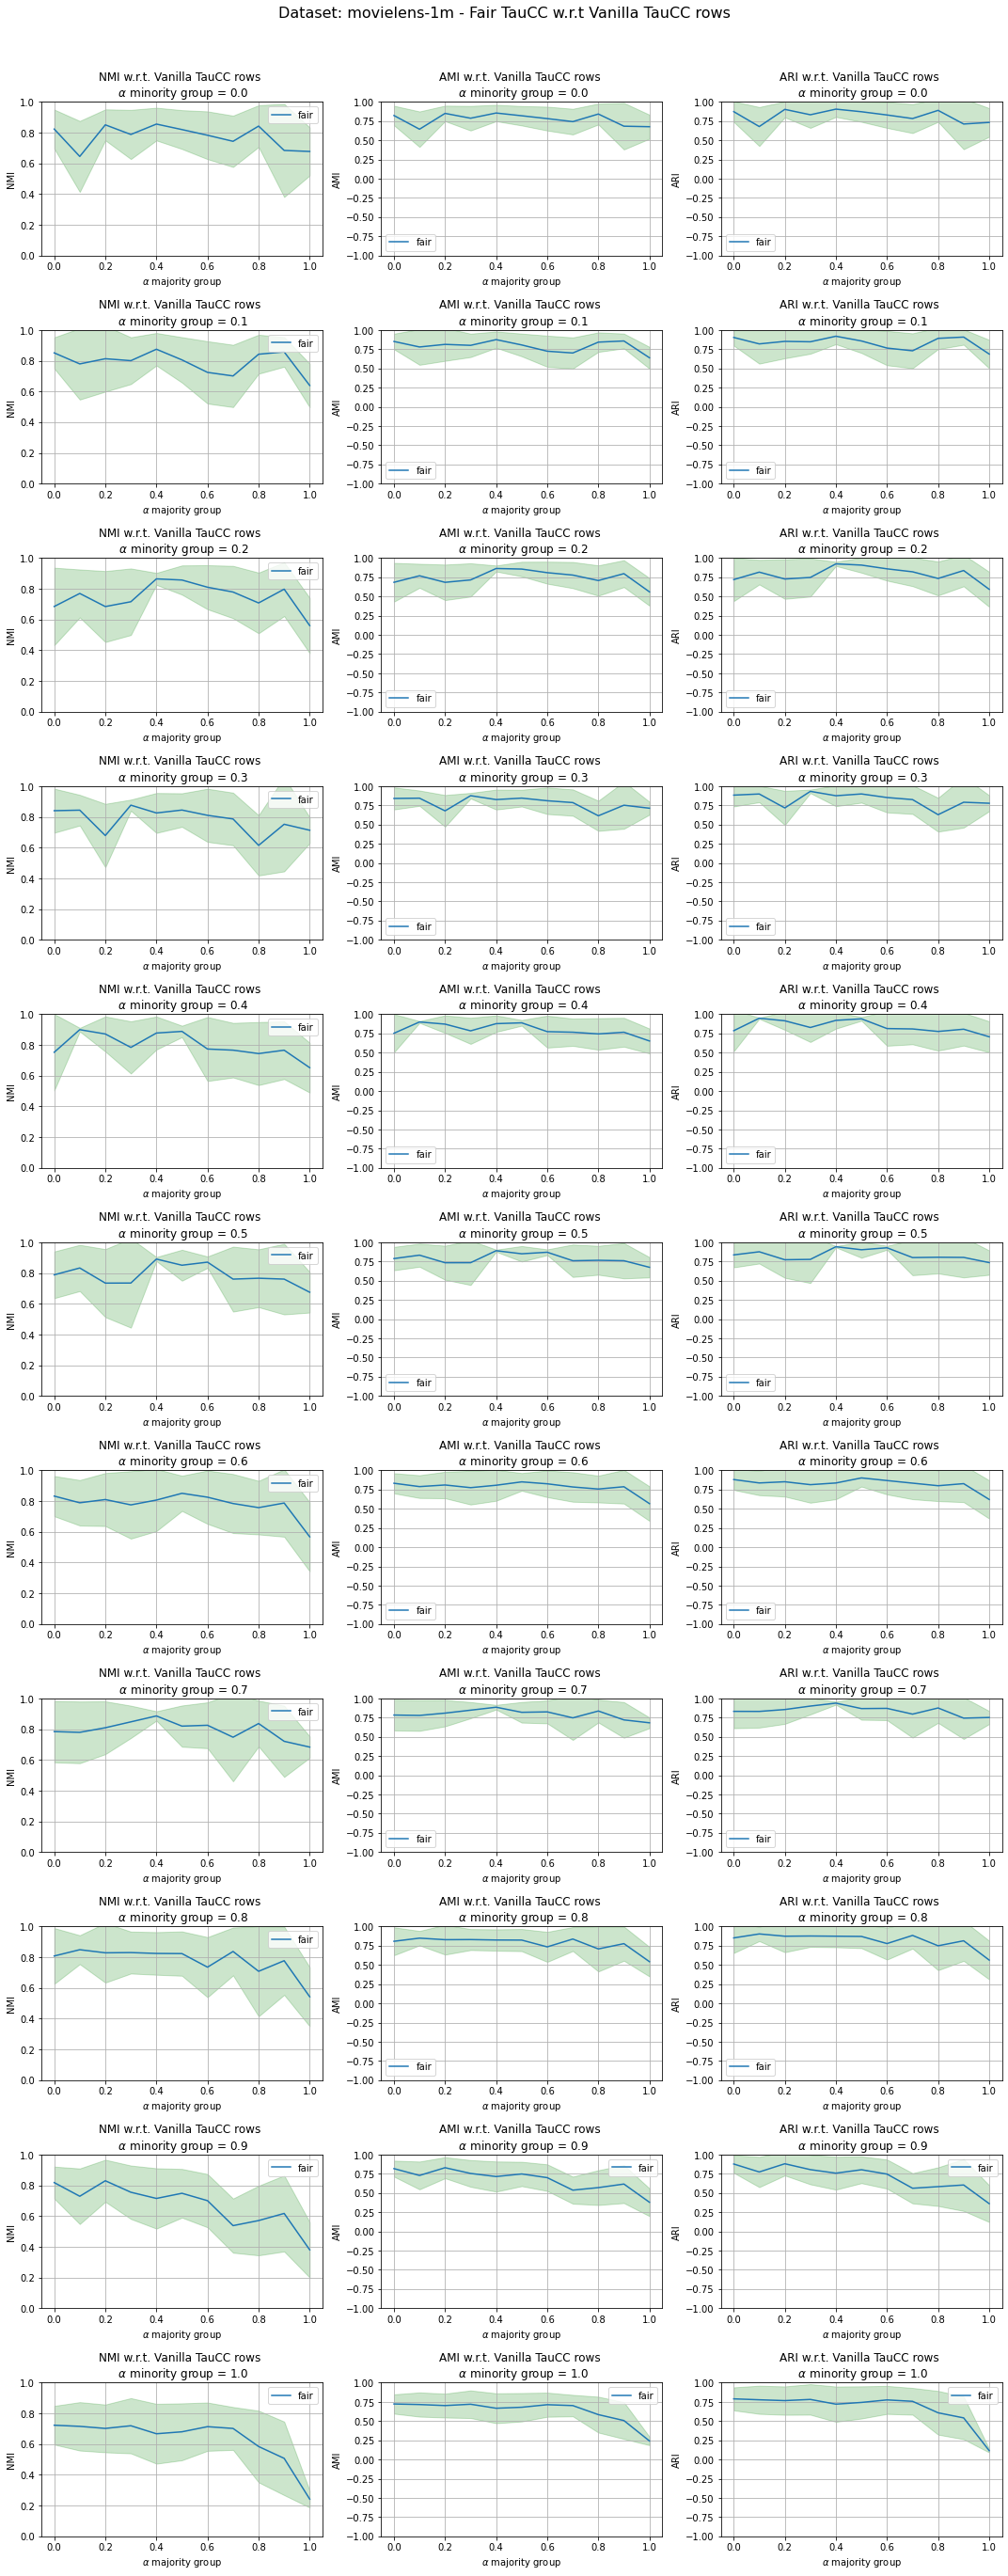

In [14]:
fig, axes = plt.subplots(11, 3, figsize=(15, 40))

for row, v in enumerate(values):
        
    temp = df[df["fair_minor"] == v]
    x = np.array(temp["fair_major"].values)
    
    NMI_mean = np.array(temp["NMI_rows_mean"].values)
    NMI_std = np.array(temp["NMI_rows_std"].values)
    
    AMI_mean = np.array(temp["AMI_rows_mean"].values)
    AMI_std = np.array(temp["AMI_rows_std"].values)
    
    ARI_mean = np.array(temp["ARI_rows_mean"].values)
    ARI_std = np.array(temp["ARI_rows_std"].values)
    
    ax = axes[row, 0]
    ax.plot(x, NMI_mean, label='fair')
    ax.fill_between(x, NMI_mean - NMI_std, NMI_mean + NMI_std, alpha=0.2, color='g')
    ax.set_ylim(0.0, 1.0)
    ax.legend()
    ax.set_xlabel('$\\alpha$ majority group')
    ax.set_ylabel('NMI')
    ax.set_title(f'NMI w.r.t. Vanilla TauCC rows \n $\\alpha$ minority group = {v}')
    ax.grid(True)
    
    ax1 = axes[row, 1]
    ax1.plot(x, AMI_mean, label='fair')
    ax1.fill_between(x, AMI_mean - AMI_std, AMI_mean + AMI_std, alpha=0.2, color='g')
    ax1.set_ylim(-1.0, 1.0)
    ax1.legend()
    ax1.set_xlabel('$\\alpha$ majority group')
    ax1.set_ylabel('AMI')
    ax1.set_title(f'AMI w.r.t. Vanilla TauCC rows \n $\\alpha$ minority group = {v}')
    ax1.grid(True)
    
    ax2 = axes[row, 2]
    ax2.plot(x, ARI_mean, label='fair')
    ax2.fill_between(x, ARI_mean - ARI_std, ARI_mean + ARI_std, alpha=0.2, color='g')
    ax2.set_ylim(-1.0, 1.0)
    ax2.legend()
    ax2.set_xlabel('$\\alpha$ majority group')
    ax2.set_ylabel('ARI')
    ax2.set_title(f'ARI w.r.t. Vanilla TauCC rows \n $\\alpha$ minority group = {v}')
    ax2.grid(True)
        
plt.tight_layout(rect=[0, 0.03, 1, 0.96])
fig.suptitle(f"Dataset: {dataset} - Fair TauCC w.r.t Vanilla TauCC rows", fontsize=16)
#plt.show()
plt.savefig(plot_path + f"/rows_minority.png")

## Plot of NMI, ARI, AMI w.r.t. Vanilla TauCC columns

NMI, ARI, AMI w.r.t. Vanilla TauCC columns (fairness for majority group fixed)

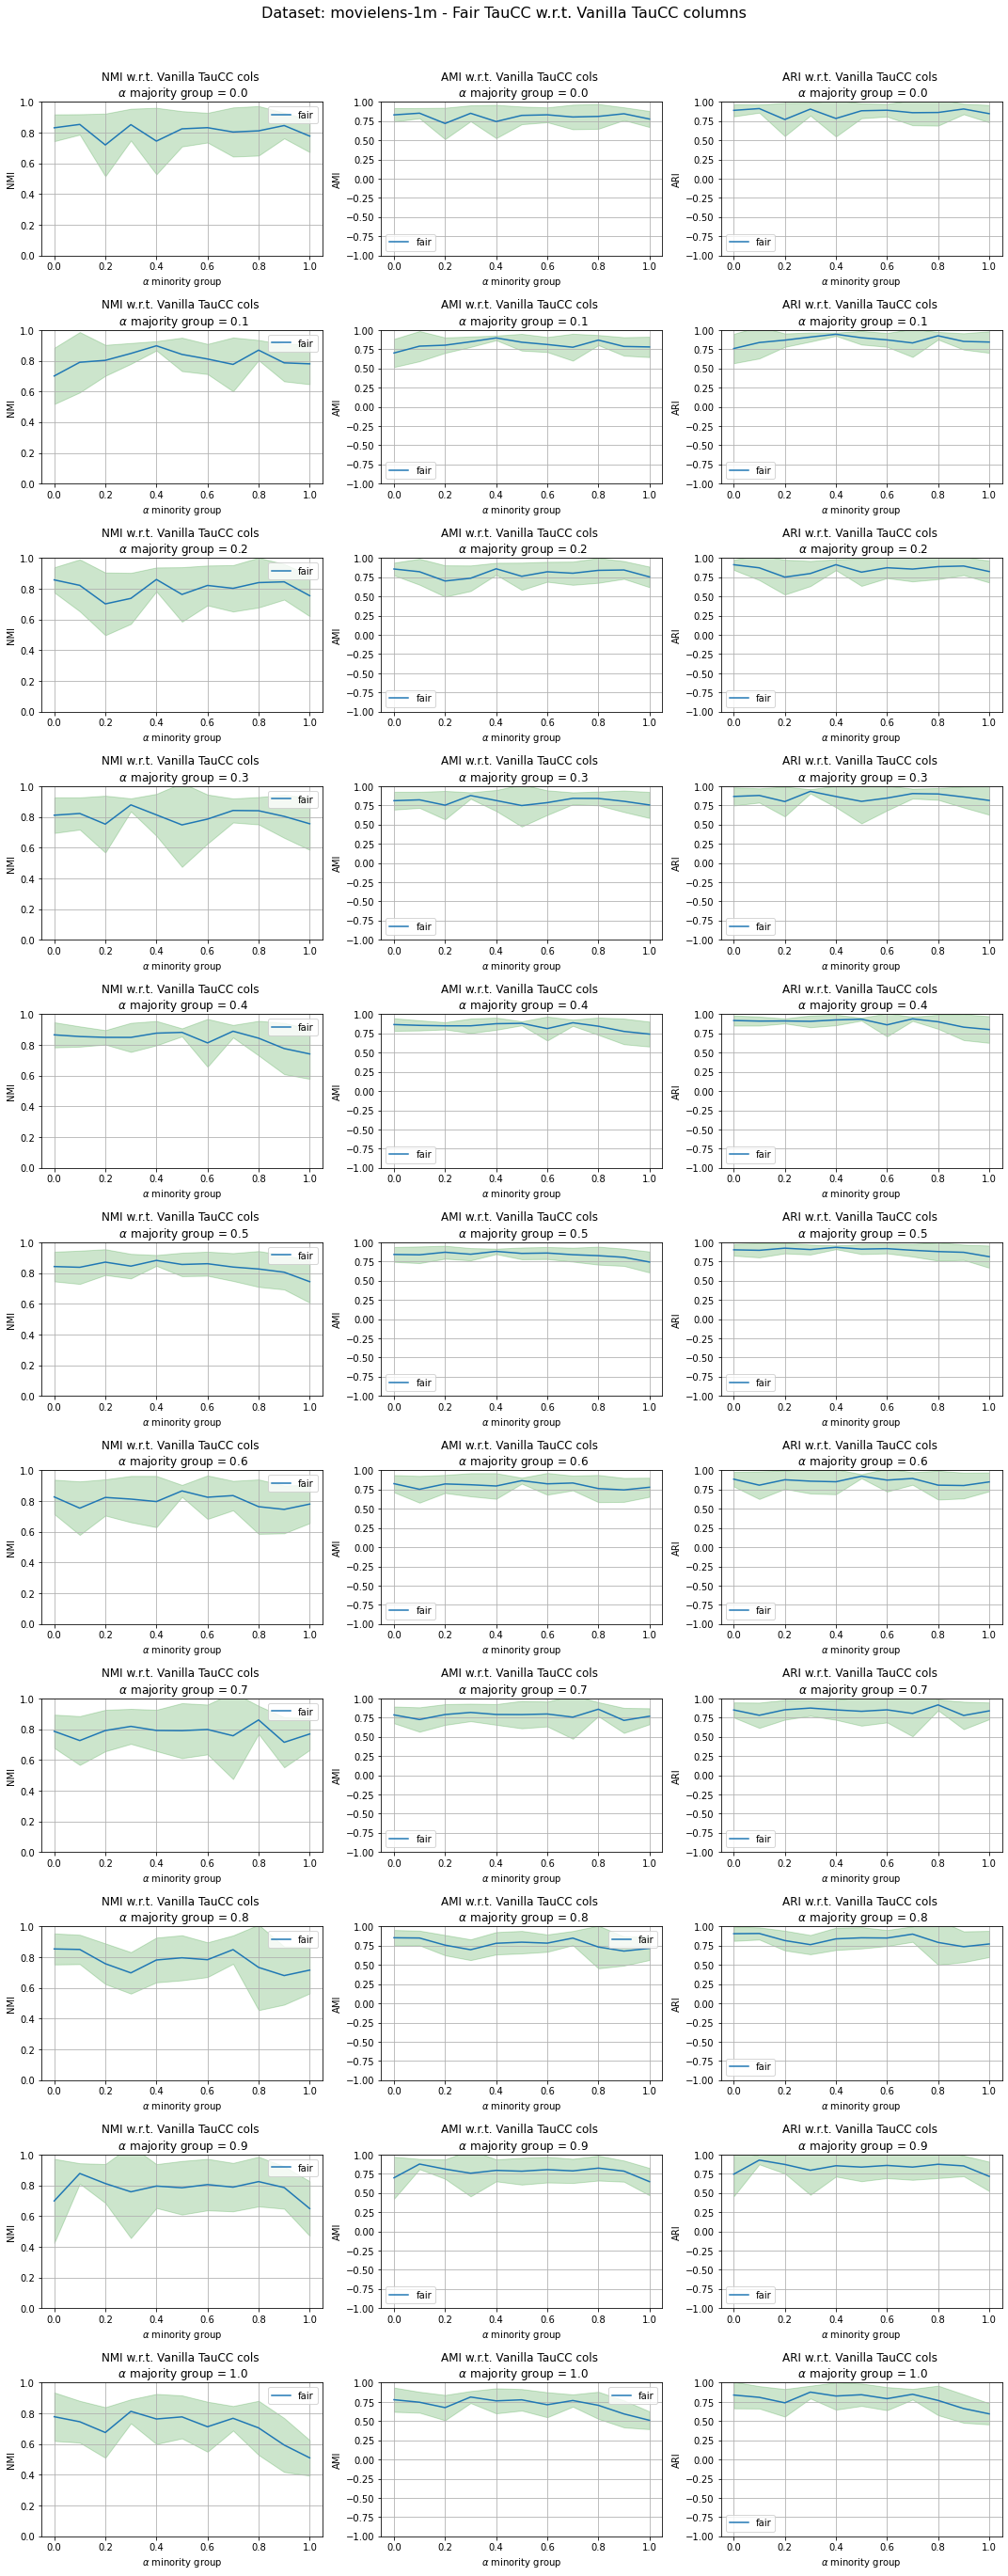

In [15]:
fig, axes = plt.subplots(11, 3, figsize=(15, 40))


for row, v in enumerate(values):
        
    temp = df[df["fair_major"] == v]
    x = np.array(temp["fair_minor"].values)
    
    NMI_mean = np.array(temp["NMI_cols_mean"].values)
    NMI_std = np.array(temp["NMI_cols_std"].values)
    
    AMI_mean = np.array(temp["AMI_cols_mean"].values)
    AMI_std = np.array(temp["AMI_cols_std"].values)
    
    ARI_mean = np.array(temp["ARI_cols_mean"].values)
    ARI_std = np.array(temp["ARI_cols_std"].values)
    
    ax = axes[row, 0]
    ax.plot(x, NMI_mean, label='fair')
    ax.fill_between(x, NMI_mean - NMI_std, NMI_mean + NMI_std, alpha=0.2, color='g')
    ax.set_ylim(0.0, 1.0)
    ax.legend()
    ax.set_xlabel('$\\alpha$ minority group')
    ax.set_ylabel('NMI')
    ax.set_title(f'NMI w.r.t. Vanilla TauCC cols \n $\\alpha$ majority group = {v}')
    ax.grid(True)
    
    ax1 = axes[row, 1]
    ax1.plot(x, AMI_mean, label='fair')
    ax1.fill_between(x, AMI_mean - AMI_std, AMI_mean + AMI_std, alpha=0.2, color='g')
    ax1.set_ylim(-1.0, 1.0)
    ax1.legend()
    ax1.set_xlabel('$\\alpha$ minority group')
    ax1.set_ylabel('AMI')
    ax1.set_title(f'AMI w.r.t. Vanilla TauCC cols \n $\\alpha$ majority group = {v}')
    ax1.grid(True)
    
    ax2 = axes[row, 2]
    ax2.plot(x, ARI_mean, label='fair')
    ax2.fill_between(x, ARI_mean - ARI_std, ARI_mean + ARI_std, alpha=0.2, color='g')
    ax2.set_ylim(-1.0, 1.0)
    ax2.legend()
    ax2.set_xlabel('$\\alpha$ minority group')
    ax2.set_ylabel('ARI')
    ax2.set_title(f'ARI w.r.t. Vanilla TauCC cols \n $\\alpha$ majority group = {v}')
    ax2.grid(True)
        
plt.tight_layout(rect=[0, 0.03, 1, 0.96])
fig.suptitle(f"Dataset: {dataset} - Fair TauCC w.r.t. Vanilla TauCC columns", fontsize=16)
#plt.show()
plt.savefig(plot_path + f"/cols_majority.png")

NMI, ARI, AMI w.r.t. Vanilla TauCC columns (fairness for minority group fixed)

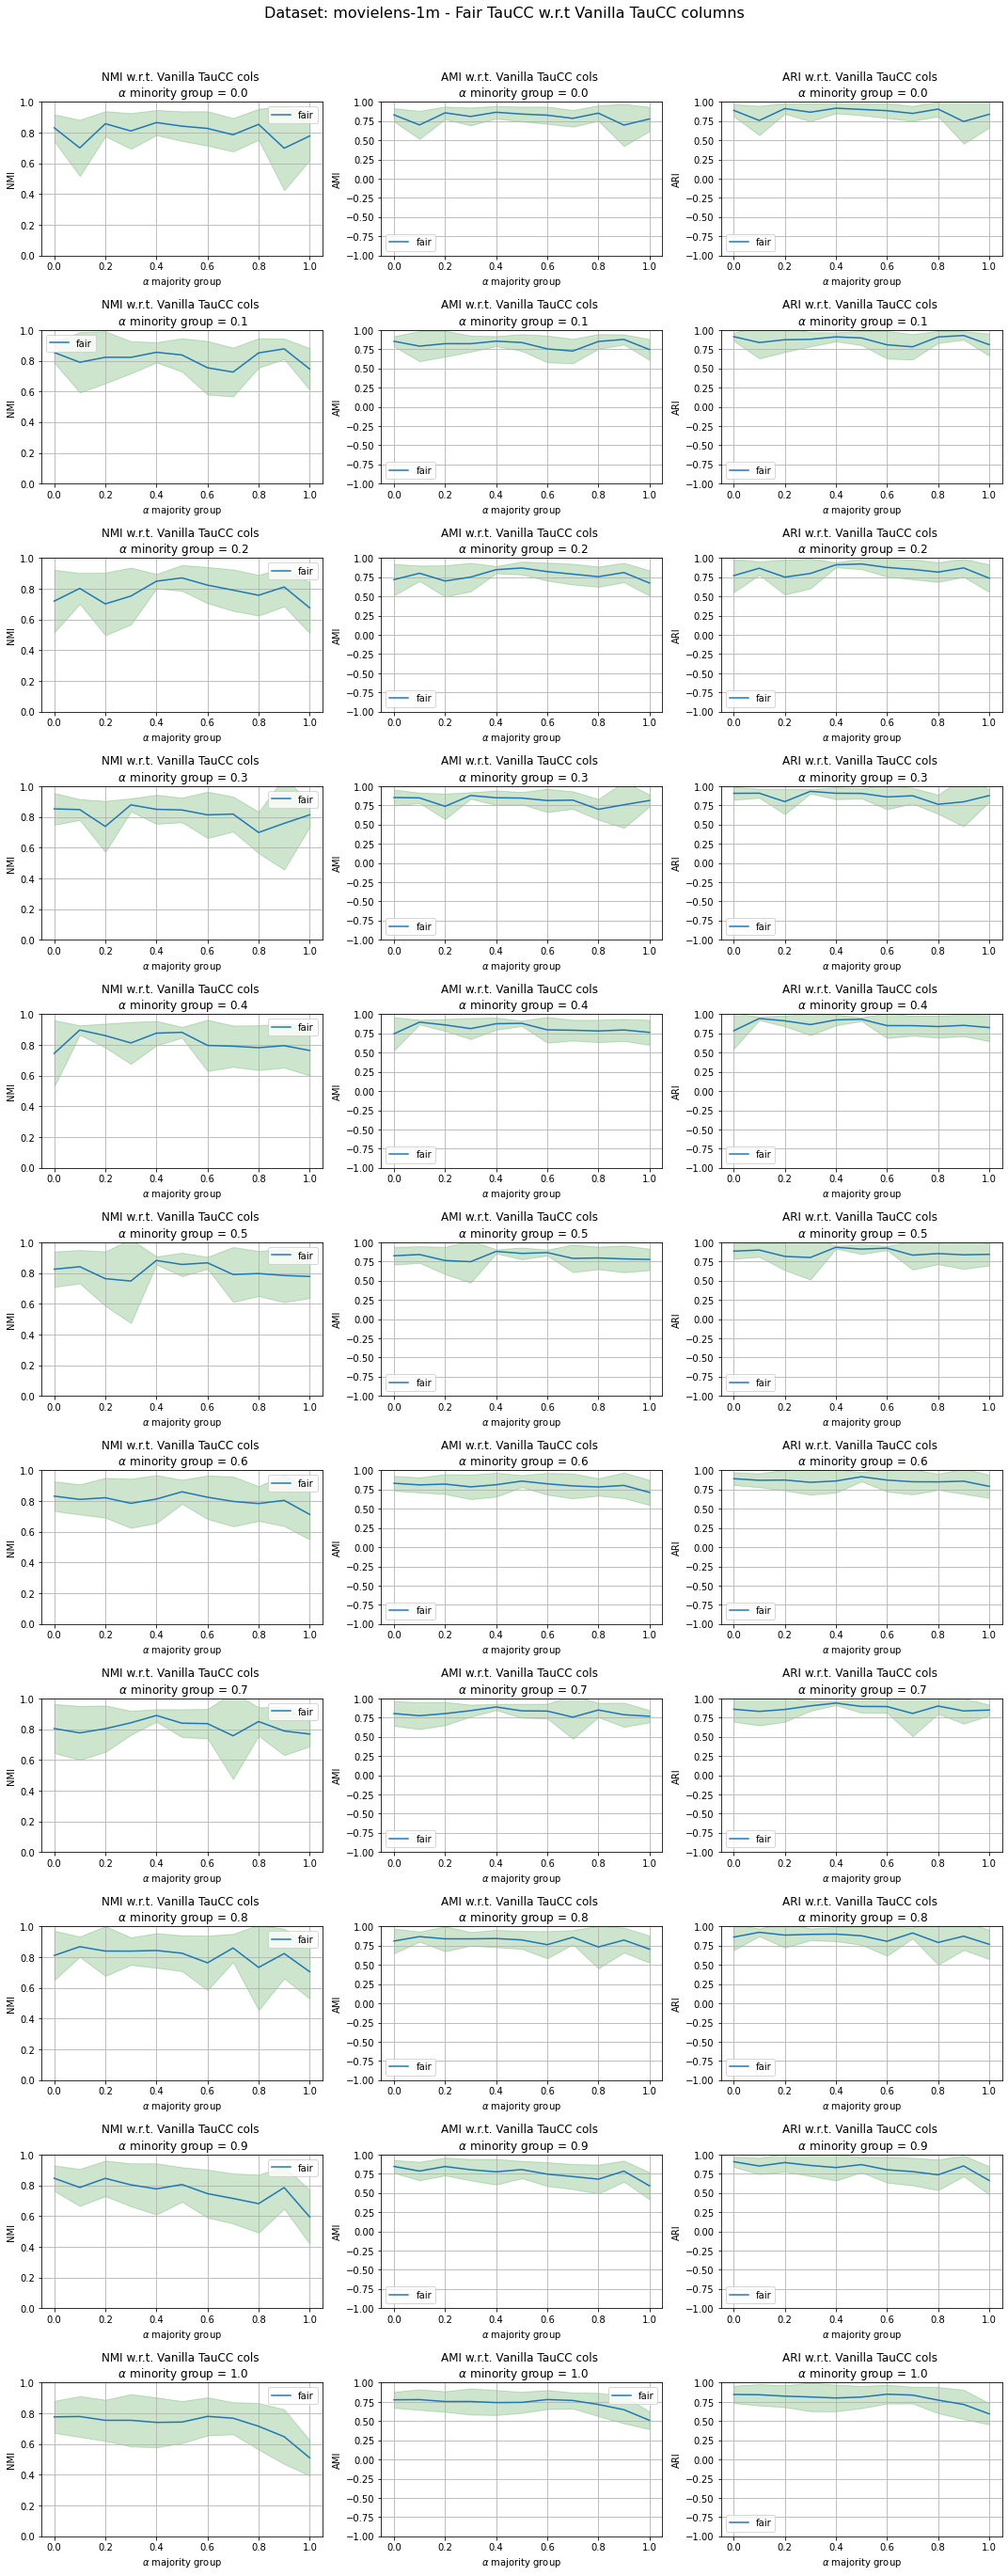

In [16]:
fig, axes = plt.subplots(11, 3, figsize=(15, 40))

for row, v in enumerate(values):
        
    temp = df[df["fair_minor"] == v]
    x = np.array(temp["fair_major"].values)
    
    NMI_mean = np.array(temp["NMI_cols_mean"].values)
    NMI_std = np.array(temp["NMI_cols_std"].values)
    
    AMI_mean = np.array(temp["AMI_cols_mean"].values)
    AMI_std = np.array(temp["AMI_cols_std"].values)
    
    ARI_mean = np.array(temp["ARI_cols_mean"].values)
    ARI_std = np.array(temp["ARI_cols_std"].values)
    
    ax = axes[row, 0]
    ax.plot(x, NMI_mean, label='fair')
    ax.fill_between(x, NMI_mean - NMI_std, NMI_mean + NMI_std, alpha=0.2, color='g')
    ax.set_ylim(0.0, 1.0)
    ax.legend()
    ax.set_xlabel('$\\alpha$ majority group')
    ax.set_ylabel('NMI')
    ax.set_title(f'NMI w.r.t. Vanilla TauCC cols \n $\\alpha$ minority group = {v}')
    ax.grid(True)
    
    ax1 = axes[row, 1]
    ax1.plot(x, AMI_mean, label='fair')
    ax1.fill_between(x, AMI_mean - AMI_std, AMI_mean + AMI_std, alpha=0.2, color='g')
    ax1.set_ylim(-1.0, 1.0)
    ax1.legend()
    ax1.set_xlabel('$\\alpha$ majority group')
    ax1.set_ylabel('AMI')
    ax1.set_title(f'AMI w.r.t. Vanilla TauCC cols \n $\\alpha$ minority group = {v}')
    ax1.grid(True)
    
    ax2 = axes[row, 2]
    ax2.plot(x, ARI_mean, label='fair')
    ax2.fill_between(x, ARI_mean - ARI_std, ARI_mean + ARI_std, alpha=0.2, color='g')
    ax2.set_ylim(-1.0, 1.0)
    ax2.legend()
    ax2.set_xlabel('$\\alpha$ majority group')
    ax2.set_ylabel('ARI')
    ax2.set_title(f'ARI w.r.t. Vanilla TauCC cols \n $\\alpha$ minority group = {v}')
    ax2.grid(True)
        
plt.tight_layout(rect=[0, 0.03, 1, 0.96])
fig.suptitle(f"Dataset: {dataset} - Fair TauCC w.r.t Vanilla TauCC columns", fontsize=16)
#plt.show()
plt.savefig(plot_path + f"/cols_minority.png")

# Plot of taus (vanilla vs fair)

Plot of tau x and tau y  (fairness for majority group fixed)

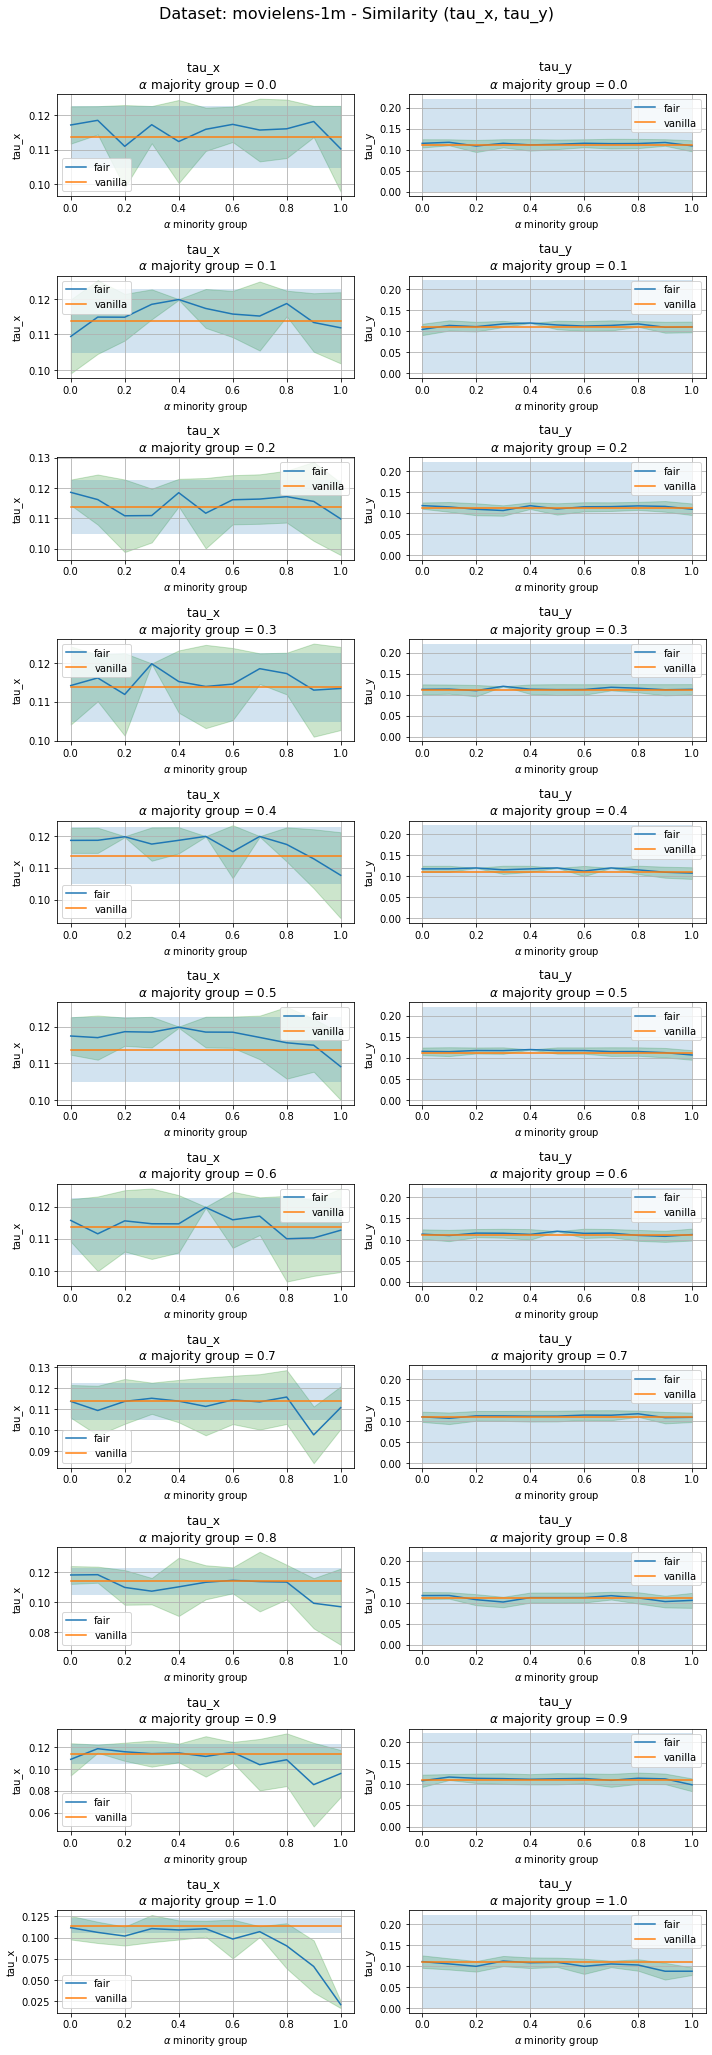

In [17]:
fig, axes = plt.subplots(11, 2, figsize=(10, 30))

vanilla_taux_mean = np.full(len(values), df_vanilla["tau_x_mean"].values[0])
vanilla_taux_std = np.full(len(values), df_vanilla["tau_x_std"].values[0])
vanilla_tauy_mean = np.full(len(values), df_vanilla["tau_y_mean"].values[0])
vanilla_tauy_std = np.full(len(values), df_vanilla["tau_y_mean"].values[0])


for row, v in enumerate(values):
        
    temp = df[df["fair_major"] == v]
    x = np.array(temp["fair_minor"].values)
    taux_mean = np.array(temp["tau_x_mean"].values)
    taux_std = np.array(temp["tau_x_std"].values)
    
    tauy_mean = np.array(temp["tau_y_mean"].values)
    tauy_std = np.array(temp["tau_y_std"].values)
        
    ax = axes[row, 0]
    
    # fair
    ax.plot(x, taux_mean, label='fair')
    ax.fill_between(x, taux_mean - taux_std, taux_mean + taux_std, alpha=0.2, color='g')
    # vanilla
    ax.plot(x, vanilla_taux_mean, label='vanilla')
    ax.fill_between(x, vanilla_taux_mean - vanilla_taux_std, vanilla_taux_mean + vanilla_taux_std, alpha=0.2)
    #ax.set_ylim(0.0, 1.0)
    ax.legend()
    ax.set_xlabel('$\\alpha$ minority group')
    ax.set_ylabel('tau_x')
    ax.set_title(f'tau_x \n $\\alpha$ majority group = {v}')
    ax.grid(True)
    
    ax1 = axes[row, 1]
    ax1.plot(x, tauy_mean, label='fair')
    ax1.fill_between(x, tauy_mean - tauy_std, tauy_mean + tauy_std, alpha=0.2, color='g')
    ax1.plot(x, vanilla_tauy_mean, label='vanilla')
    ax1.fill_between(x, vanilla_tauy_mean - vanilla_tauy_std, vanilla_tauy_mean + vanilla_tauy_std, alpha=0.2) 
    #ax1.set_ylim(0.0, 1.0)
    ax1.legend()
    ax1.set_xlabel('$\\alpha$ minority group')
    ax1.set_ylabel('tau_y')
    ax1.set_title(f'tau_y \n $\\alpha$ majority group = {v}')
    ax1.grid(True)
            
plt.tight_layout(rect=[0, 0.03, 1, 0.96])
fig.suptitle(f"Dataset: {dataset} - Similarity (tau_x, tau_y)", fontsize=16)
#plt.show()
plt.savefig(plot_path + f"/taus_majority.png")

Plot of tau x and tau y (fairness for minority group fixed)

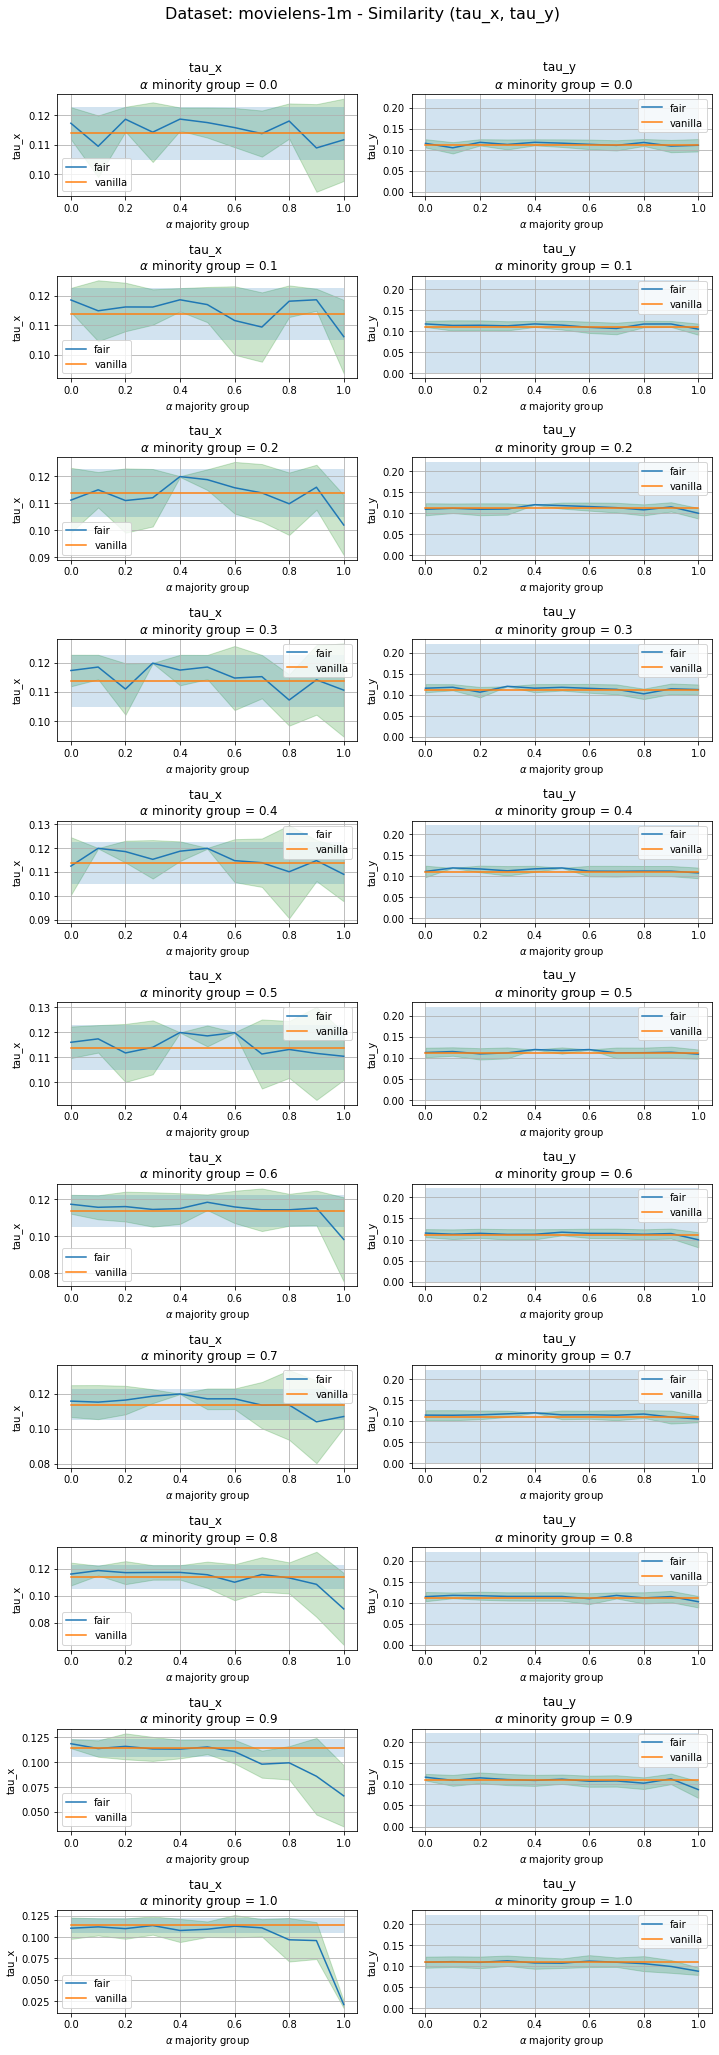

In [18]:
fig, axes = plt.subplots(11, 2, figsize=(10, 30))

vanilla_taux_mean = np.full(len(values), df_vanilla["tau_x_mean"].values[0])
vanilla_taux_std = np.full(len(values), df_vanilla["tau_x_std"].values[0])
vanilla_tauy_mean = np.full(len(values), df_vanilla["tau_y_mean"].values[0])
vanilla_tauy_std = np.full(len(values), df_vanilla["tau_y_mean"].values[0])


for row, v in enumerate(values):
        
    temp = df[df["fair_minor"] == v]
    x = np.array(temp["fair_major"].values)
    
    taux_mean = np.array(temp["tau_x_mean"].values)
    taux_std = np.array(temp["tau_x_std"].values)
    
    tauy_mean = np.array(temp["tau_y_mean"].values)
    tauy_std = np.array(temp["tau_y_std"].values)
        
    ax = axes[row, 0]
    
    # fair
    ax.plot(x, taux_mean, label='fair')
    ax.fill_between(x, taux_mean - taux_std, taux_mean + taux_std, alpha=0.2, color='g')
    # vanilla
    ax.plot(x, vanilla_taux_mean, label='vanilla')
    ax.fill_between(x, vanilla_taux_mean - vanilla_taux_std, vanilla_taux_mean + vanilla_taux_std, alpha=0.2)
    #ax.set_ylim(0.0, 1.0)
    ax.legend()
    ax.set_xlabel('$\\alpha$ majority group')
    ax.set_ylabel('tau_x')
    ax.set_title(f'tau_x \n $\\alpha$ minority group = {v}')
    ax.grid(True)
    
    ax1 = axes[row, 1]
    ax1.plot(x, tauy_mean, label='fair')
    ax1.fill_between(x, tauy_mean - tauy_std, tauy_mean + tauy_std, alpha=0.2, color='g')
    ax1.plot(x, vanilla_tauy_mean, label='vanilla')
    ax1.fill_between(x, vanilla_tauy_mean - vanilla_tauy_std, vanilla_tauy_mean + vanilla_tauy_std, alpha=0.2) 
    #ax1.set_ylim(0.0, 1.0)
    ax1.legend()
    ax1.set_xlabel('$\\alpha$ majority group')
    ax1.set_ylabel('tau_y')
    ax1.set_title(f'tau_y \n $\\alpha$ minority group = {v}')
    ax1.grid(True)
            
plt.tight_layout(rect=[0, 0.03, 1, 0.96])
fig.suptitle(f"Dataset: {dataset} - Similarity (tau_x, tau_y)", fontsize=16)
#plt.show()
plt.savefig(plot_path + f"/taus_minority.png")